In [73]:
import json
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

plt.rcParams["figure.dpi"] = 200
plt.rcParams["font.family"] = "Times New Roman"

SMALL_SIZE = 11
MEDIUM_SIZE = 15
BIGGER_SIZE = 16

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=BIGGER_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [74]:
def get_confusion_matrix(prediction, target, choices = [" positive", " negative"]):
    for i in range(len(prediction)):
        if(prediction[i] not in choices):
            for wrong in choices:
                if(wrong != target[i]):
                    prediction[i] = wrong
    tn, fp, fn, tp = confusion_matrix(target, prediction).ravel()
    return tn, fp, fn, tp

## Parameter Tuning

In [75]:
exp1_path = "Saved_weights/EXP1/"
prompt_log_format = "Prompt-Tuning/gpt2-medium/logs_prompt_size__{}.json"
prompt_dims = [2, 4, 8, 16, 32]
bal_acc = []

for prefix_size in prompt_dims:
    with open(exp1_path + prompt_log_format.format(prefix_size)) as f:
        result = json.load(f)
    cur_acc = result["test_logs"]["balanced_accuracy"]
    if(cur_acc == -1):
        tn, fp, fn, tp = get_confusion_matrix(result["test_logs"]["prediction"], result["test_logs"]["target"])
        sensitivity = tp/(tp + fn)
        specificity = tn/(tn + fp)
        cur_acc = (sensitivity + specificity)/2
    bal_acc.append(cur_acc)

In [76]:
bal_acc

[0.9161499322701206,
 0.921526865417752,
 0.9263969760591246,
 0.9264979046017163,
 0.9320026229905185]

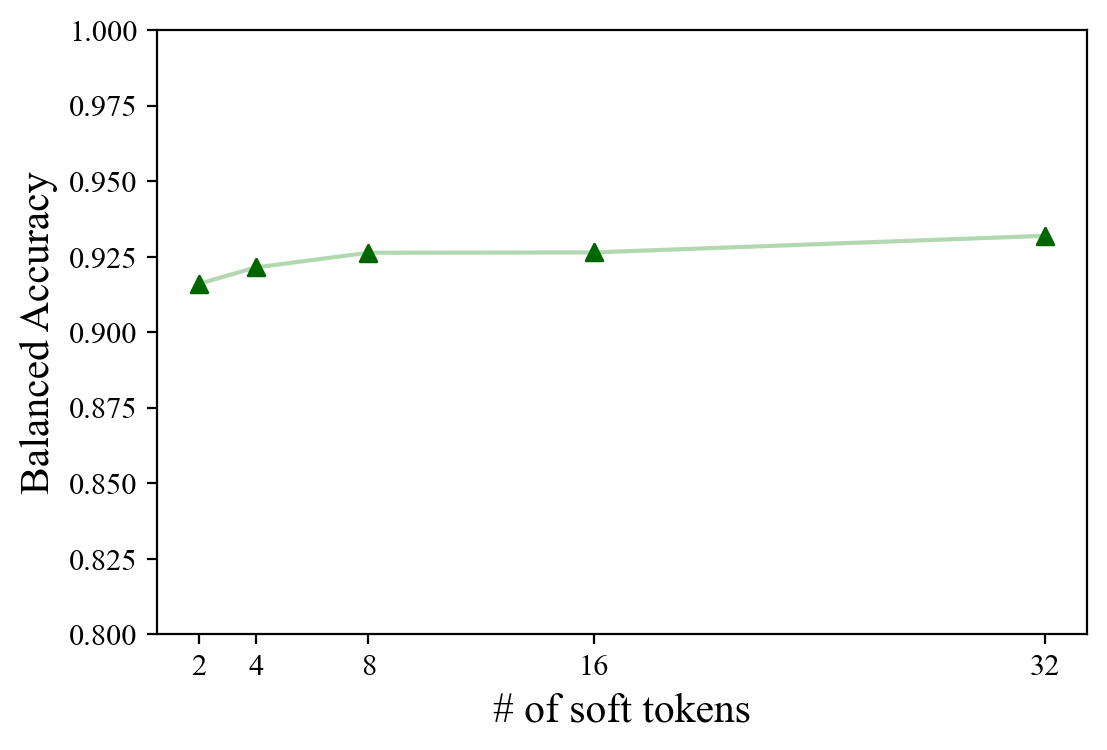

In [77]:
plt.scatter(prompt_dims, bal_acc, marker = "^", c = "darkgreen")
plt.plot(prompt_dims, bal_acc, alpha = 0.3, c = "green")
plt.xticks(prompt_dims)
plt.gca().set_ylim(bottom=0.8, top = 1.0)
plt.ylabel("Balanced Accuracy")
plt.xlabel("# of soft tokens")
plt.savefig("Figures/param_prompt_tuning.pdf", format="pdf", bbox_inches='tight')

In [78]:
exp1_path = "Saved_weights/EXP1/"
prompt_log_format = "Prefix-Tuning/gpt2-medium/logs_prefix_size__{}.json"
prompt_dims = [2, 4, 8, 16, 32]
bal_acc = []

for prefix_size in prompt_dims:
    with open(exp1_path + prompt_log_format.format(prefix_size)) as f:
        result = json.load(f)
    cur_acc = result["test_logs"]["balanced_accuracy"]
    if(cur_acc == -1):
        tn, fp, fn, tp = get_confusion_matrix(result["test_logs"]["prediction"], result["test_logs"]["target"])
        sensitivity = tp/(tp + fn)
        specificity = tn/(tn + fp)
        cur_acc = (sensitivity + specificity)/2
    bal_acc.append(cur_acc)

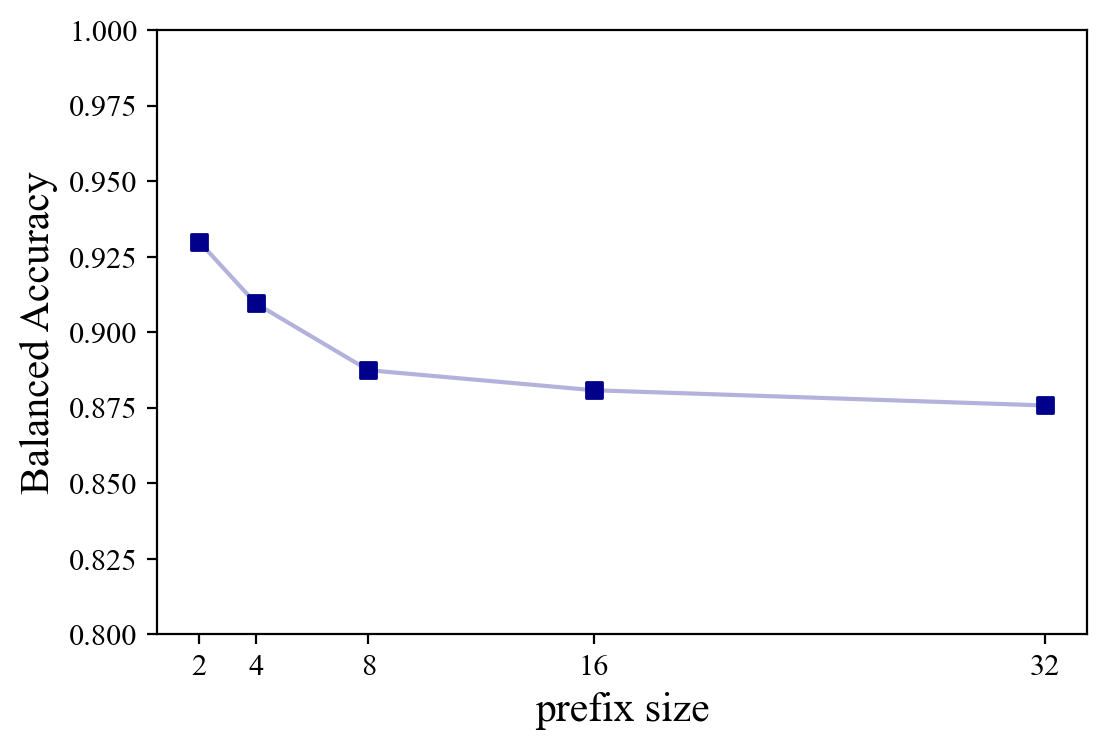

In [79]:
plt.scatter(prompt_dims, bal_acc, marker = ",", c = "darkblue")
plt.plot(prompt_dims, bal_acc, alpha = 0.3, c = "darkblue")
plt.xticks(prompt_dims)
plt.gca().set_ylim(bottom=0.8, top = 1.0)
plt.ylabel("Balanced Accuracy")
plt.xlabel("prefix size")
plt.savefig("Figures/param_prefix_tuning.pdf", format="pdf", bbox_inches='tight')

In [80]:
exp1_path = "Saved_weights/EXP1/"
prompt_log_format = "Adapters/gpt2-medium/logs_adapter_dim__{}.json"
adapter_dims = [16, 32, 64, 128, 256, 512, 1024]
bal_acc = []

for adapter_size in adapter_dims:
    with open(exp1_path + prompt_log_format.format(adapter_size)) as f:
        result = json.load(f)
    cur_acc = result["test_logs"]["balanced_accuracy"]
    if(cur_acc == -1):
        tn, fp, fn, tp = get_confusion_matrix(result["test_logs"]["prediction"], result["test_logs"]["target"])
        sensitivity = tp/(tp + fn)
        specificity = tn/(tn + fp)
        cur_acc = (sensitivity + specificity)/2
    bal_acc.append(cur_acc)

In [81]:
adapter_dims = adapter_dims[:-1]
bal_acc = bal_acc[:-1]

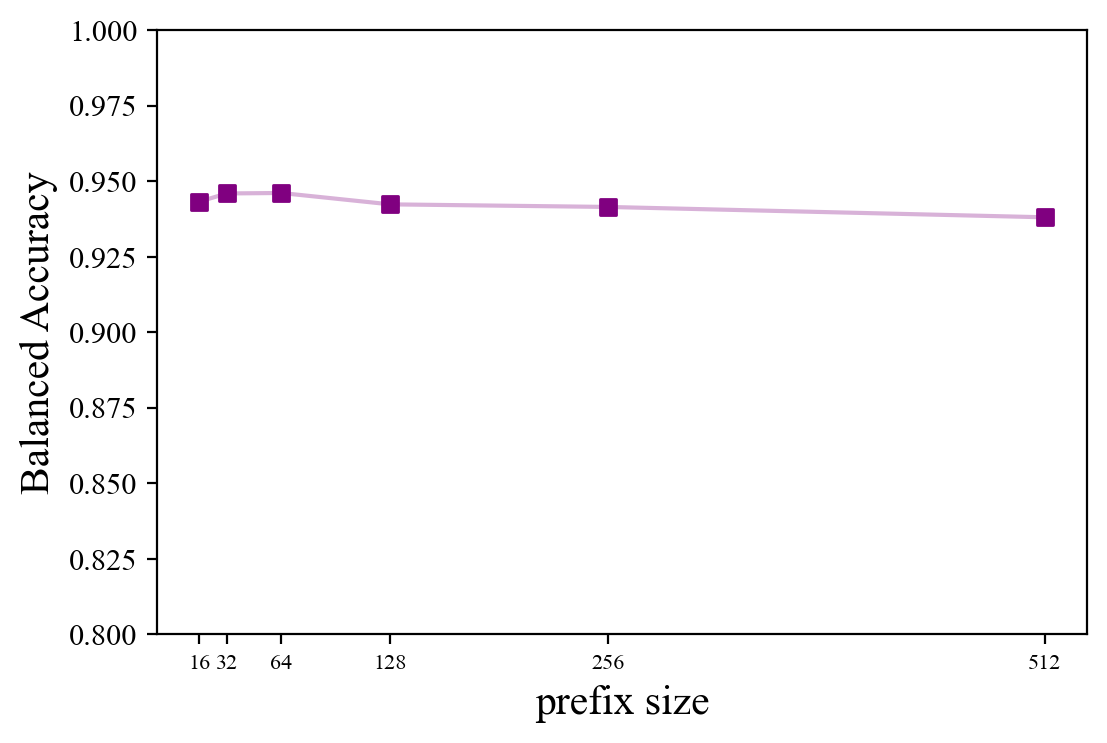

In [83]:
plt.rc("xtick", labelsize=8)  # fontsize of the tick labels
plt.scatter(adapter_dims, bal_acc, marker = ",", c = "purple")
plt.plot(adapter_dims, bal_acc, alpha = 0.3, c = "purple")
plt.xticks(adapter_dims)
plt.gca().set_ylim(bottom=0.8, top = 1.0)
plt.ylabel("Balanced Accuracy")
plt.xlabel("prefix size")
plt.savefig("Figures/param_adapter_tuning.pdf", format="pdf", bbox_inches='tight')